In [2]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays

### Comparison between exact Leverage Scores (LSs) and empirical LSs

Combinatorial Laplacian

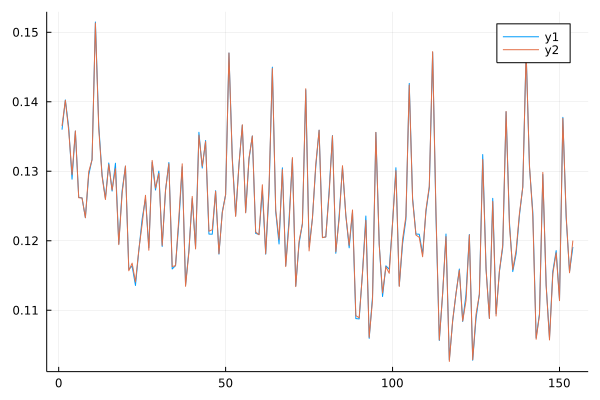

In [15]:
n = 20
p = 0.8
eta = 0.0

rng = Random.default_rng()

meta_g = gen_graph_mun(rng, n, p, eta)
q = 0
B_ust = Matrix(magnetic_incidence_matrix(meta_g; oriented=true, phases=false))
lev = leverage_score(B_ust, q)

nb_samples = 1000000
q = 0
emp_lev = emp_leverage_score(rng, meta_g, q, nb_samples; weighted=false, absorbing_node=true, ust=true)

plot(lev)
plot!(emp_lev)


Magnetic Laplacian

In [1]:
n = 20
p = 0.5
eta = 0.1

rng = Random.default_rng()
meta_g = gen_graph_mun(rng, n, p, eta)
B = magnetic_incidence(meta_g)
L = B * B'

q = 0

nb_samples = 1e4:1e4:3*1e4
inf_error = zeros(size(nb_samples))
for i = 1:length(nb_samples)
    emp_lev = emp_leverage_score(rng, meta_g, q, nb_samples[i])
    lev = leverage_score(B, q)

    inf_error[i] = norm(emp_lev - lev,Inf)
end

plot(range_MC, inf_error)


UndefVarError: UndefVarError: Random not defined